# Task

In a <b>new notebook</b>, use transfer learning to solve an image classification task on the [Cars vs Bikes](https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset) dataset. Please follow the same pipeline we did in this lab (you may copy-paste and reuse codeblocks). You will be graded on the following:

* [3 pt] <b>Dataset:</b>
  * **[1pt]** Downloading and extracting dataset correctly.

  * **[1pt]** Displaying a list of class labels, and visualizing 25 random sample images with their class labels.

  *  **[1pt]**loading the image data from a generator with the correct preprocessing parameters.


* [3 pt] <b>Model:</b>
  * **[1pt]** Choosing and downloading a base model other than the one used in this lab.
  * **[1pt]** Freezing an appropriate number of layers based on the criteria explained in this lab.

  * **[1pt]** Choosing an appropriate optimizer, loss function, and hyperparameters (such as learning rate).

* [1 pt] <b>Training:</b>

  * **[0.5pt]** Learning curves are shown with proper labels for axes and plots. Learning curves show the training and valdiation losses on one graph, and the training and valdiation accuracies on another graph.
  * **[0.5pt]** Learning curves do not show signs of overfitting or underfitting.

* [3 pt] <b>Evaluation:</b>
  * **[2pt]** Test accuracy.
  * **[1pt]** Confusion matrix is displayed (visualized).


<b>Tips & Hints:</b>
  * Do not forget to use the appropriate preprocessing function corresponding to your chosen pre-trained network.

  * the dataset has the train, test and validation sets in separate folders, so create a seperate generator for each with no validation split.
  
  * Use `sklearn.metrics.confusion_matrix` to print the confusion matrix. Be careful that you need to set `shuffle = False` in the test data generator. This is to make sure that the test set will be generated in the same order every time.

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '14ZlDXNcFDTD1zG9ZDHvVL_3IXhizinDt'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('archive.zip')

In [ ]:
!mkdir /content/Car-Bike-Dataset
!unzip -q /content/archive.zip -d /content/Car-Bike-Dataset

In [ ]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import random
from glob import glob
from pathlib import Path
DATASET_DIR = os.path.join("/content/Car-Bike-Dataset", "Car-Bike-Dataset")
all_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*jpg'))]
all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]

# train_test_percentage=0.3
# test_data_length=int(train_test_percentage*len(all_data))

# ALLLL = list(zip(all_data, all_data))
# random.shuffle(ALLLL)
# all_data[:], all_labels[:] = zip(*ALLLL)

# Split the data and labels into training and test sets
# TEST_DATA = all_data[:test_data_length]
# TEST_LABELS = all_labels[:test_data_length]
# TRAIN_DATA = all_data[test_data_length:]
# TRAIN_LABELS = all_labels[test_data_length:]




# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(DATASET_DIR, output="./Car_BIKE",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values
TRAIN_DIR = './Car_BIKE/train'
VAL_DIR = './Car_BIKE/val'
TEST_DIR = './Car_BIKE/test'

print(len(all_labels))
all_data[:10]
TRAIN_DIR[:9]

Copying files: 4000 files [00:00, 4585.57 files/s]

235


'./Car_BIK'

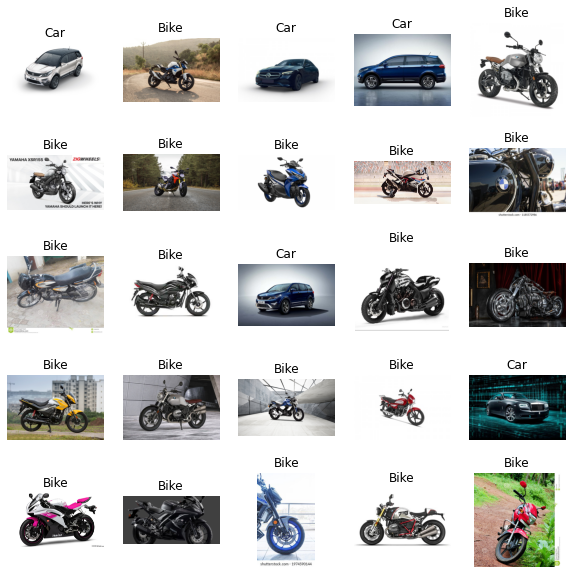

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]

# Plot the 25 images
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')

plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

BATCH_SIZE = 64
HEIGHT = 200
WIDTH = 200
VAL_SPLIT = 0.2

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=20,
      validation_split = VAL_SPLIT
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 2560 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')

Found 640 images belonging to 2 classes.


In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 400 images belonging to 2 classes.


In [ ]:
!pip install keras
!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout

# Load model without classification head
base_model = ResNet50(include_top = False,
                   weights = 'imagenet',
                   input_shape = (HEIGHT, WIDTH, 3))

# Print base model summary
base_model.summary()

# Freeze layers in the base model
for layer in base_model.layers[:-10]:
    layer.trainable = False

# # Add classification head
# x = base_model.output
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(2, activation='softmax')(x)

# # Final model
# model = Model(inputs=base_model.input, outputs=predictions)

# model.summary()


# Add new classifier layers
x = Flatten()(base_model.layers[-1].output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Define new model
model = Model(inputs = base_model.inputs, outputs = output)

# Print summary
model.summary()

# Compile
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
import tensorflow as tf

INITIAL_EPOCHS = 10

history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = INITIAL_EPOCHS)

Epoch 1/10
 4/40 [==>...........................] - ETA: 27s - loss: 30.5441 - accuracy: 0.7031

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 [==============================] - 51s 1s/step - loss: 3.4417 - accuracy: 0.9488 - val_loss: 5.2465 - val_accuracy: 0.9297
Epoch 2/10
40/40 [==============================] - 43s 1s/step - loss: 0.1718 - accuracy: 0.9863 - val_loss: 0.4731 - val_accuracy: 0.9812
Epoch 3/10
40/40 [==============================] - 44s 1s/step - loss: 0.0721 - accuracy: 0.9934 - val_loss: 0.8848 - val_accuracy: 0.9703
Epoch 4/10
40/40 [==============================] - 46s 1s/step - loss: 0.0476 - accuracy: 0.9949 - val_loss: 0.3405 - val_accuracy: 0.9859
Epoch 5/10
40/40 [==============================] - 43s 1s/step - loss: 0.0644 - accuracy: 0.9961 - val_loss: 0.3830 - val_accuracy: 0.9781
Epoch 6/10
40/40 [==============================] - 43s 1s/step - loss: 0.0502 - accuracy: 0.9953 - val_loss: 0.1392 - val_accuracy: 0.9875
Epoch 7/10
40/40 [==============================] - 43s 1s/step - loss: 0.0325 - accuracy: 0.9984 - val_loss: 0.0745 - val_accuracy: 0.9922
Epoch 8/10
40/40 [=============

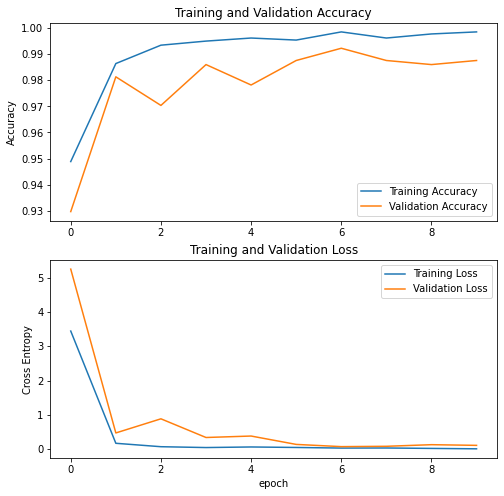

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(test_generator)

7/7 [==============================] - 2s 200ms/step - loss: 0.0314 - accuracy: 0.9975


[0.031355805695056915, 0.9975000023841858]

In [ ]:
for i, layer in enumerate(base_model.layers[:-10]):
  print(i, layer.name, layer.trainable)


0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

7/7 [==============================] - 1s 208ms/step


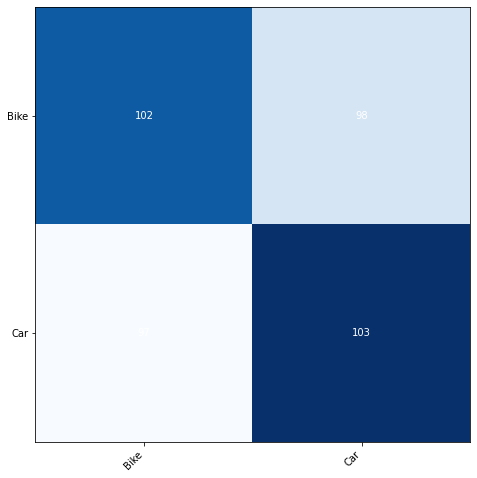

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions for test data
y_pred = model.predict(test_generator).argmax(axis=1)

# Get true labels for test data
y_true = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
classes = list(test_generator.class_indices.keys())
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha="right")
ax.set_yticklabels(classes)
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > len(test_generator)/len(classes) else "black")
plt.show()

In [ ]:
# Save fine-tuned model
model.save('fine_tuned_model.h5')

# Load saved model for testing
from tensorflow.keras.models import load_model

loaded_model = load_model('fine_tuned_model.h5')

# Evaluate the loaded model on test data
test_loss, test_acc = loaded_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

7/7 [==============================] - 2s 192ms/step - loss: 0.0314 - accuracy: 0.9975
Test accuracy: 0.9975000023841858
